/home/aaliaan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/home/aaliaan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/home/aaliaan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


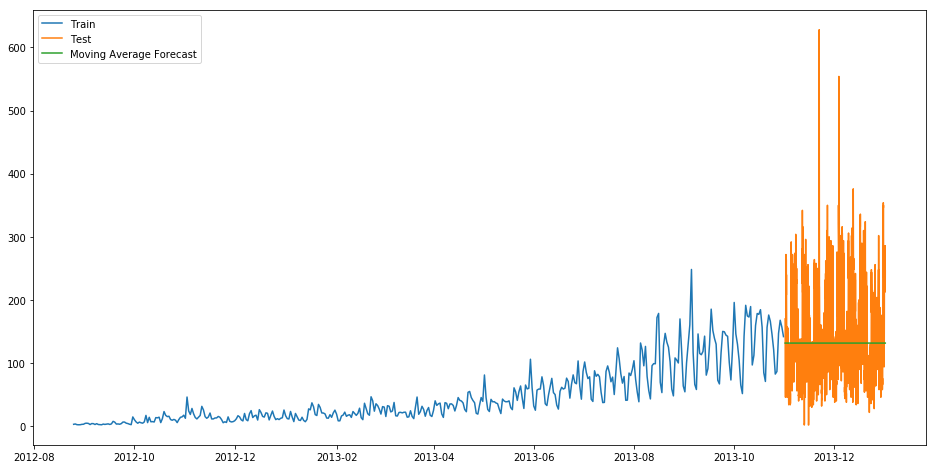

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

# subset dataset
# index 11856 = end of 2013
df = pd.read_csv('train.csv', nrows=11856)

# create train and test
# index 10392 = end of oct 2013
train = df[0:10392]
test = df[10392:]

# aggregate dataset at daily level
df.Timestamp = pd.to_datetime(df.Datetime, format='%d-%m-%Y %H:%M')
df.index = df.Timestamp
df = df.resample('D').mean()
train.Timestamp = pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp
train = train.resample('D').mean()
test.Timestamp = pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

# Calculation involveds a sliding windows

y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()
